In [46]:
import seaborn as sns

import matplotlib.pyplot as plt

import numpy as np

import pandas as pd

In [47]:
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [48]:
ped=pd.read_excel('F:\\fertility data\\SUMBJ1807\\pedigree.xlsx')

In [49]:
data=pd.read_csv('F:\\fertility data\\SUMBJ1807\\final.csv',sep=',',low_memory=False)

In [50]:
ped.head()

DAM            ID SIRE  IDLIST  SIRECODE  DAMCODE     BIRTH SEX
0  F0   M0001HO0261   M0       1         0        0  1900/1/0   M
1  F0       M00-104   M0       2         0        0  1900/1/0   M
2  F0  M0011HO88013   M0       3         0        0  1900/1/0   M
3  F0   M001JE00672   M0       4         0        0  1900/1/0   M
4  F0  M0029HO02611   M0       5         0        0  1900/1/0   M

In [51]:
ped1=ped[['ID','IDLIST','DAMCODE']] #SB,CE需要用到母畜效应，保留damcode

In [52]:
ped1.rename(columns={'ID':'FID'},inplace=True)

E:\Anaconda\lib\site-packages\pandas\core\frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


# 对繁殖数据的胎次进行筛选整理

In [53]:
data.head()

FID  胎次  HERD            cowtai       YMB      HYB  YMC  HYC  \
0  F459001097033  --     1  F459001097033.--  199704.0  11997.0  NaN  NaN   
1  F459001097110  --     1  F459001097110.--  199711.0  11997.0  NaN  NaN   
2  F459001D97138  --     1  F459001D97138.--  199712.0  11997.0  NaN  NaN   
3  F459001098011  --     1  F459001098011.--  199802.0  11998.0  NaN  NaN   
4  F459001098047  --     1  F459001098047.--  199806.0  11998.0  NaN  NaN   

        YMI      HYI  ST   SC  CALF    AFS     AFC  IFL  CE  SB  ICF  
0  200001.0  12000.0 NaN  2.0   NaN    NaN     NaN  0.0 NaN NaN  NaN  
1  199905.0  11999.0 NaN  2.0   NaN  543.0   820.0  0.0 NaN NaN  NaN  
2  200003.0  12000.0 NaN  2.0   NaN  804.0  1081.0  0.0 NaN NaN  NaN  
3  200002.0  12000.0 NaN  2.0   NaN  733.0  1010.0  0.0 NaN NaN  NaN  
4  200001.0  12000.0 NaN  2.0   NaN  580.0   857.0  0.0 NaN NaN  NaN

In [54]:
data['胎次'].describe() #可以看出胎次有很多类别，汇总一下

count     690584
unique        19
top           --
freq      337555
Name: 胎次, dtype: object

In [55]:
data['胎次'].value_counts() 

--                       337555
1                        136045
2                         97901
3                         59222
4                         30574
5                         15113
6                          8088
7                          3427
8                          1575
9                           637
10                          227
255                         130
11                           63
12                           19
13                            3
--1,0\r\r\r\r\r\n--"         2
51,0                         1
--1,0\r\r\r\n--"             1
21,0                         1
Name: 胎次, dtype: int64

接下来检查是否日期格式的数据都来自一个牛场？

In [56]:
data1=data.copy()

In [57]:
data1['胎次']=data1['胎次'].apply(lambda s: str(s))
data1['LEN']=data1['胎次'].apply(lambda s: len(s))

直接将长度>2的数据删除

In [58]:
data2=data1[data1['LEN']<=2]

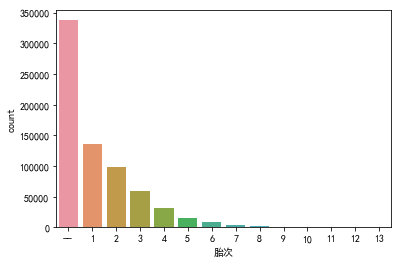

In [59]:
sns.countplot(x='胎次',data=data2)

可见胎次分布不是很均匀，先分离青年牛和经产牛，然后将经产牛4胎及以上合并。

# AFS均匀分开作为新效应MF添加进DATA中

In [60]:
data2['MF'] = pd.cut(data2['AFS'], 5,labels=[1, 2, 3, 4, 5]) #数据AFS均分5份

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [61]:
data2.head()

FID  胎次  HERD            cowtai       YMB      HYB  YMC  HYC  \
0  F459001097033  --     1  F459001097033.--  199704.0  11997.0  NaN  NaN   
1  F459001097110  --     1  F459001097110.--  199711.0  11997.0  NaN  NaN   
2  F459001D97138  --     1  F459001D97138.--  199712.0  11997.0  NaN  NaN   
3  F459001098011  --     1  F459001098011.--  199802.0  11998.0  NaN  NaN   
4  F459001098047  --     1  F459001098047.--  199806.0  11998.0  NaN  NaN   

        YMI      HYI ...    SC  CALF    AFS     AFC  IFL  CE  SB  ICF  LEN  \
0  200001.0  12000.0 ...   2.0   NaN    NaN     NaN  0.0 NaN NaN  NaN    2   
1  199905.0  11999.0 ...   2.0   NaN  543.0   820.0  0.0 NaN NaN  NaN    2   
2  200003.0  12000.0 ...   2.0   NaN  804.0  1081.0  0.0 NaN NaN  NaN    2   
3  200002.0  12000.0 ...   2.0   NaN  733.0  1010.0  0.0 NaN NaN  NaN    2   
4  200001.0  12000.0 ...   2.0   NaN  580.0   857.0  0.0 NaN NaN  NaN    2   

    MF  
0  NaN  
1  3.0  
2  5.0  
3  4.0  
4  3.0  

[5 rows x 21 columns]

# 与系谱合并

In [62]:
data2['FID']=data2['FID'].apply(lambda s: str(s))

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [63]:
ped1['FID']=ped1['FID'].apply(lambda s: str(s))

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [64]:
data_sum=pd.merge(data2,ped1,on='FID',how='left')

ValueError: Buffer dtype mismatch, expected 'Python object' but got 'double'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'double'


筛选出与系谱匹配的数据，并将整型效应缺失值填充0，实型变量缺失值填充为-9999

In [65]:
data_sum=data_sum.dropna(axis=0,how='any',subset=['IDLIST'])

# 青年牛性状提取

In [66]:
data_sum.head()

FID  胎次  HERD            cowtai       YMB      HYB  YMC  HYC  \
13000  F110015092111  --     2  F110015092111.--  199206.0  21992.0  NaN  NaN   
13003  F110015092186  --     2  F110015092186.--  199208.0  21992.0  NaN  NaN   
13004  F110015092207  --     2  F110015092207.--  199209.0  21992.0  NaN  NaN   
13005  F110015092240  --     2  F110015092240.--  199211.0  21992.0  NaN  NaN   
13006  F110015093010  --     2  F110015093010.--  199301.0  21993.0  NaN  NaN   

            YMI      HYI   ...       AFS    AFC  IFL  CE  SB  ICF  LEN   MF  \
13000  199310.0  21993.0   ...     492.0  769.0  0.0 NaN NaN  NaN    2  2.0   
13003  199504.0  21995.0   ...       NaN    NaN  0.0 NaN NaN  NaN    2  NaN   
13004  199402.0  21994.0   ...     528.0  805.0  0.0 NaN NaN  NaN    2  3.0   
13005  199401.0  21994.0   ...     440.0  717.0  0.0 NaN NaN  NaN    2  2.0   
13006  199601.0  21996.0   ...       NaN    NaN  0.0 NaN NaN  NaN    2  NaN   

        IDLIST  DAMCODE  
13000  71877.0      0.0  
13003  71880.0      0.0  
13004  71887.0      0.0  
13005  71895.0      0.0  
13006  71917.0      0.0  

[5 rows x 23 columns]

In [67]:
heifer=data_sum[data_sum['胎次']=='--']
heifersb=data_sum[data_sum['胎次']=='1']

In [68]:
heifer.count() #有一部分产犊数据应该是记录错误，直接舍去即可

FID        184921
胎次         184921
HERD       184921
cowtai     184921
YMB        167461
HYB        167461
YMC           599
HYC           599
YMI        132715
HYI        132715
ST          90825
SC         132715
CALF          549
AFS        119590
AFC         91885
IFL        123270
CE            597
SB            599
ICF            92
LEN        184921
MF         119590
IDLIST     184921
DAMCODE    184921
dtype: int64

In [69]:
heifer1=heifer[['YMB','HYB','YMI','HYI','MF','ST','SC','IDLIST','AFS','AFC','IFL']]

In [70]:
heifer2=heifersb[['YMC','HYC','MF','CALF','IDLIST','DAMCODE','SB','CE']] #第一胎产犊为青年牛SB,CE数据

In [71]:
heifer1.count()

YMB       167461
HYB       167461
YMI       132715
HYI       132715
MF        119590
ST         90825
SC        132715
IDLIST    184921
AFS       119590
AFC        91885
IFL       123270
dtype: int64

In [72]:
heifer2.count()

YMC        111157
HYC        111157
MF          94888
CALF        79899
IDLIST     118097
DAMCODE    118097
SB         111155
CE         109351
dtype: int64

In [73]:
heifer2['SB'].value_counts()

1.0    101948
2.0      9207
Name: SB, dtype: int64

In [74]:
heifer2['CE'].value_counts()

1.0    104343
2.0      4103
3.0       905
Name: CE, dtype: int64

In [75]:
#heifer1.to_csv('F:\\fertility data\\SUMBJ1807\\heifer.csv',index=False,header=False,encoding='utf_8_sig')
#heifer2.to_csv('F:\\fertility data\\SUMBJ1807\\heifersb.csv',index=False,header=False,encoding='utf_8_sig')

In [76]:
heifer1.to_csv('F:\\fertility data\\SUMBJ1807\\heifer1.csv',index=False,header=True,encoding='utf_8_sig')
heifer2.to_csv('F:\\fertility data\\SUMBJ1807\\heifersb1.csv',index=False,header=True,encoding='utf_8_sig')

# 经产牛性状提取

先将经产牛4胎及以上合并

In [77]:
cow=data_sum[data_sum['胎次']!='--']

In [78]:
cow['胎次']=cow['胎次'].apply(lambda s:int(s))

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [79]:
cowsb=cow[cow['胎次']>1]  #作为SB,CE性状的经产牛部分

In [80]:
cow1=cow[['胎次','YMC','HYC','YMI','HYI','MF','ST','SC','IDLIST','ICF','IFL']]

In [81]:
cow2=cow[['胎次','YMC','HYC','MF','CALF','IDLIST','DAMCODE','SB','CE']]

In [82]:
cow1.count()

胎次        308595
YMC       293258
HYC       293258
YMI       260140
HYI       260140
MF        241161
ST        200038
SC        260140
IDLIST    308595
ICF       250101
IFL       242561
dtype: int64

In [83]:
cow2.count()

胎次         308595
YMC        293258
HYC        293258
MF         241161
CALF       221304
IDLIST     308595
DAMCODE    308595
SB         293254
CE         288574
dtype: int64

In [84]:
cow2['SB'].value_counts()

1.0    273383
2.0     19871
Name: SB, dtype: int64

In [85]:
cow2['CE'].value_counts()

1.0    275995
2.0     10127
3.0      2452
Name: CE, dtype: int64

# 缺失值填充

In [86]:
heifer2.head()

YMC      HYC   MF  CALF   IDLIST  DAMCODE   SB   CE
13008  199407.0  21994.0  2.0   NaN  71877.0      0.0  1.0  1.0
13010  199410.0  21994.0  2.0   NaN  71895.0      0.0  1.0  1.0
13011  199411.0  21994.0  3.0   NaN  71887.0      0.0  1.0  1.0
13028  199601.0  21996.0  NaN   NaN  71880.0      0.0  1.0  1.0
13043  199607.0  21996.0  3.0   NaN  72007.0      0.0  1.0  1.0

In [87]:
#for i in range(4):
    #for j in range(len(heifer2)):
        #if np.isnan(heifer2.iloc[j,i]):
            #heifer2[j,i]=666

In [88]:
#cow1.to_csv('F:\\fertility data\\SUMBJ1807\\cow.csv',index=False,header=False,encoding='utf_8_sig')
#cow2.to_csv('F:\\fertility data\\SUMBJ1807\\cowsb.csv',index=False,header=False,encoding='utf_8_sig')

In [89]:
cow1.to_csv('F:\\fertility data\\SUMBJ1807\\cow1.csv',index=False,header=True,encoding='utf_8_sig')
cow2.to_csv('F:\\fertility data\\SUMBJ1807\\cowsb1.csv',index=False,header=True,encoding='utf_8_sig')